In [91]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cross_validation import train_test_split

sns.set()
%matplotlib inline
pd.set_option('display.max_columns', 20)

In [92]:
parse_dates = ['last_trip_date', 'signup_date']
churn = pd.read_csv("data/churn.csv",parse_dates=parse_dates)
train = pd.read_csv("data/churn_train.csv",parse_dates=parse_dates)
test = pd.read_csv("data/churn_test.csv",parse_dates=parse_dates)
cutoff_date = datetime.strptime('2014-07-01','%Y-%m-%d').date() -pd.DateOffset(30, 'D')
train['active'] = train['last_trip_date'] >= cutoff_date

In [40]:
print("churn data set: " + str(churn.shape) ) 
print("training set: " + str(train.shape)) 
print("testing set: " + str(test.shape) )
missing = train.isnull().any().any() or train.isnull().any().any()
print("There is no missing values in the datasets" if not missing else "There are missing values in the dataset")

churn data set: (50000, 12)
training set: (40000, 13)
testing set: (10000, 12)
There are missing values in the dataset


In [41]:
dfs = DataFrameSummary(train)
train_summary = dfs.columns_stats
test_summary =  DataFrameSummary(test).columns_stats
train_summary

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
counts,40000,39838,33472,40000,40000,40000,39681,40000,40000,40000,40000,40000,40000
uniques,2764,27,37,111,3,182,2,31,357,57,2,641,2
missing,0,162,6528,0,0,0,319,0,0,0,0,0,0
missing_perc,0%,0.40%,16.32%,0%,0%,0%,0.80%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,categorical,date,bool,date,numeric,numeric,bool,numeric,bool


In [42]:
train.describe()

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,NaN,NaN,1.000000,0.000000,0.000000,33.300000
50%,3.880000,NaN,NaN,1.000000,0.000000,1.000000,66.700000
75%,6.930000,NaN,NaN,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [43]:
train.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,False
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,False
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,False
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,False
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,False


In [44]:

def p2f(x):
    return float(x.strip('%'))

def plot_missing(train,test):
    train_keep_stat = DataFrameSummary(train).columns_stats
    test_keep_stat = DataFrameSummary(test).columns_stats
    missing_summary = pd.concat([train_keep_stat.ix[3].apply(p2f).rename("missing_train"), test_keep_stat.ix[3].apply(p2f).rename("missing_test")], axis=1)
    # Generate Barplot of comparing activity type pervalence in train/test sets. 
    plt.figure(figsize=(16,10))
    n_classes = len(train.columns)
    plt.bar(3.5*np.arange(n_classes), missing_summary['missing_train'], width=1)
    plt.bar(3.5*np.arange(n_classes) + 1, missing_summary['missing_test'], width=1, color='r')
    plt.xticks(3.5*np.arange(n_classes) + 0.5, missing_summary.index, rotation=-15)
    plt.title('Percent of Missing in Training and Testing Datasets')
    plt.ylabel('Percent (0-100)')
    plt.xlim([0, 3.5*n_classes])
    plt.legend(['Train Datasset', 'Test Dataset'])
    plt.grid(True)
    plt.show()
    


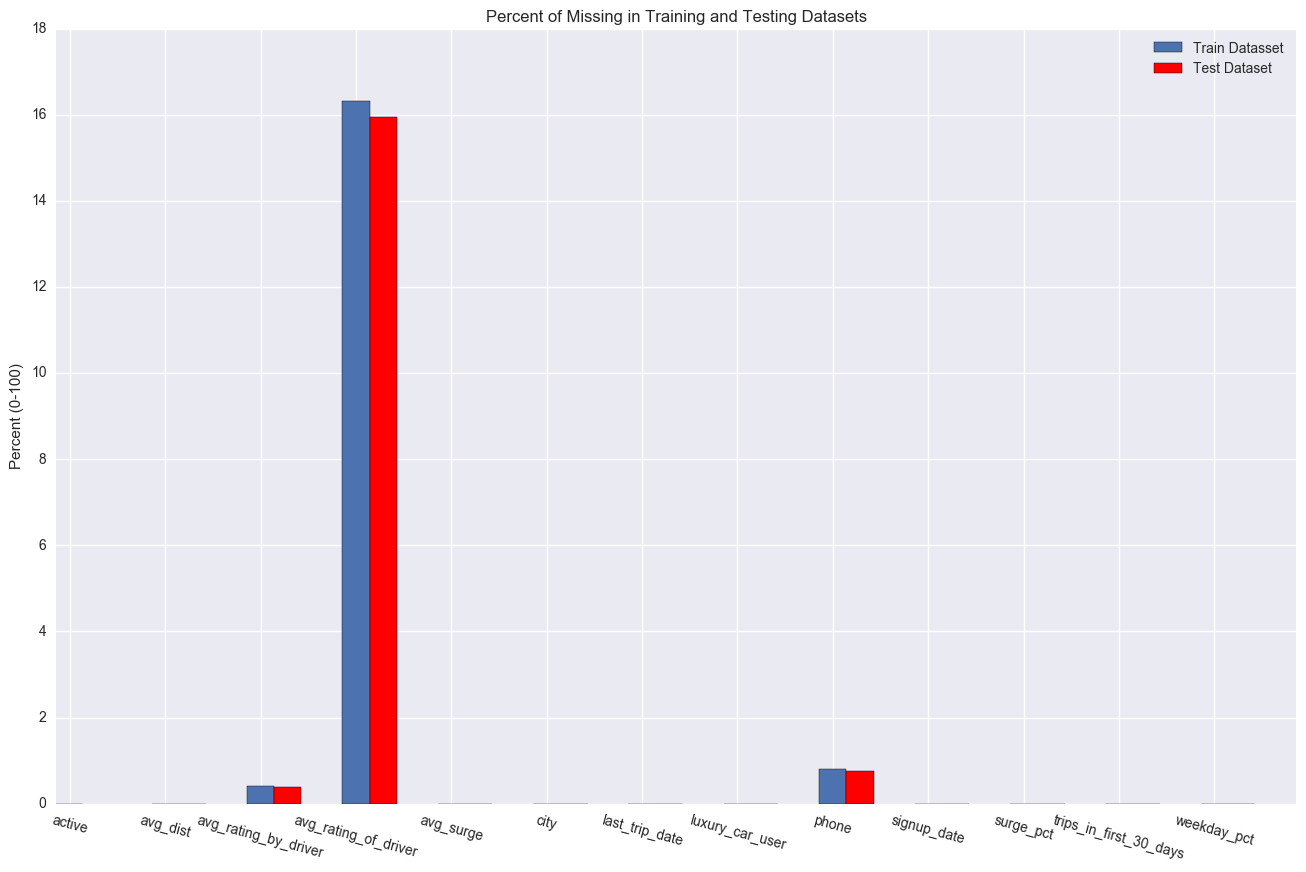

In [45]:
plot_missing(train,test)

In [46]:
def hists(train):
    for col in train.columns:
        plt.hist(train[col])
        plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11adc49e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a549c88>]], dtype=object)

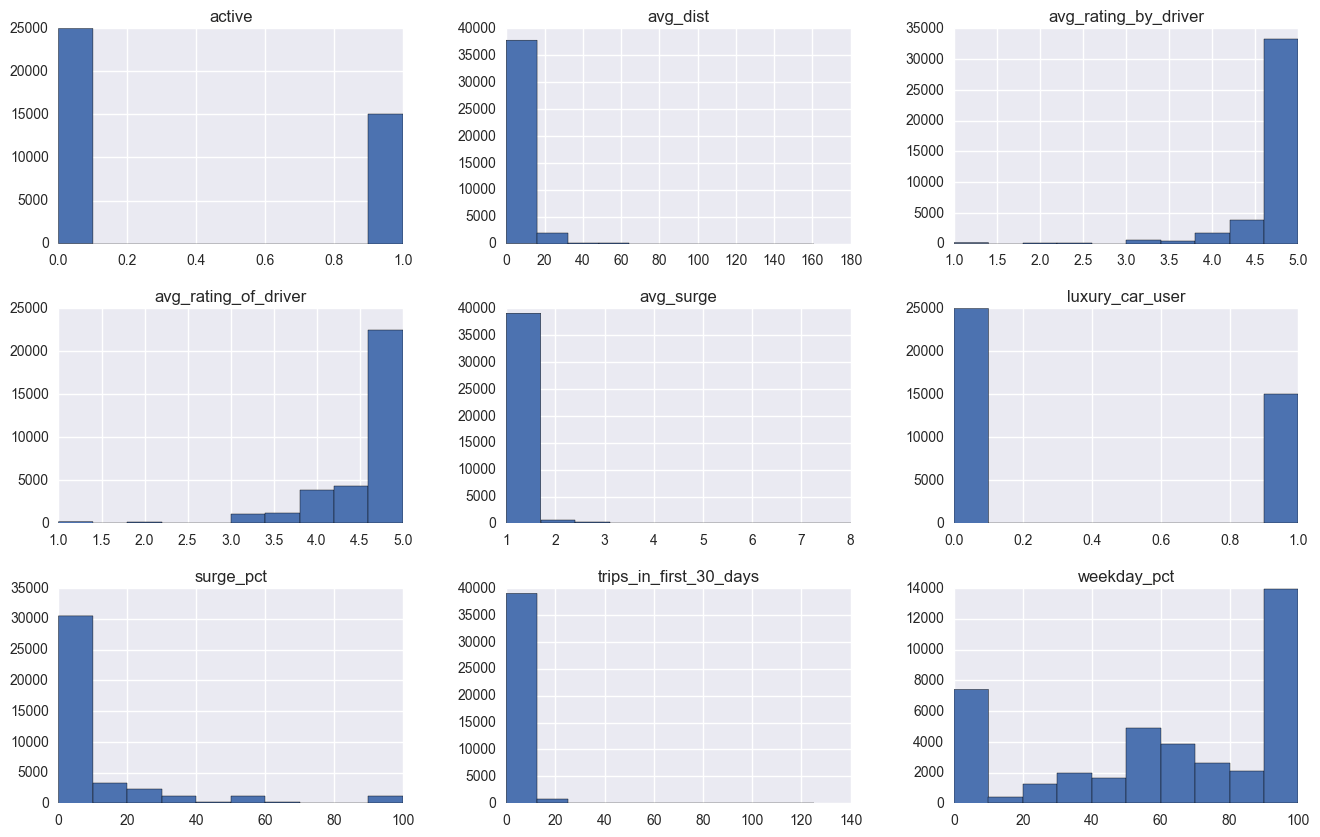

In [47]:
train.hist(figsize=(16,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dbefb00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120091b38>], dtype=object)

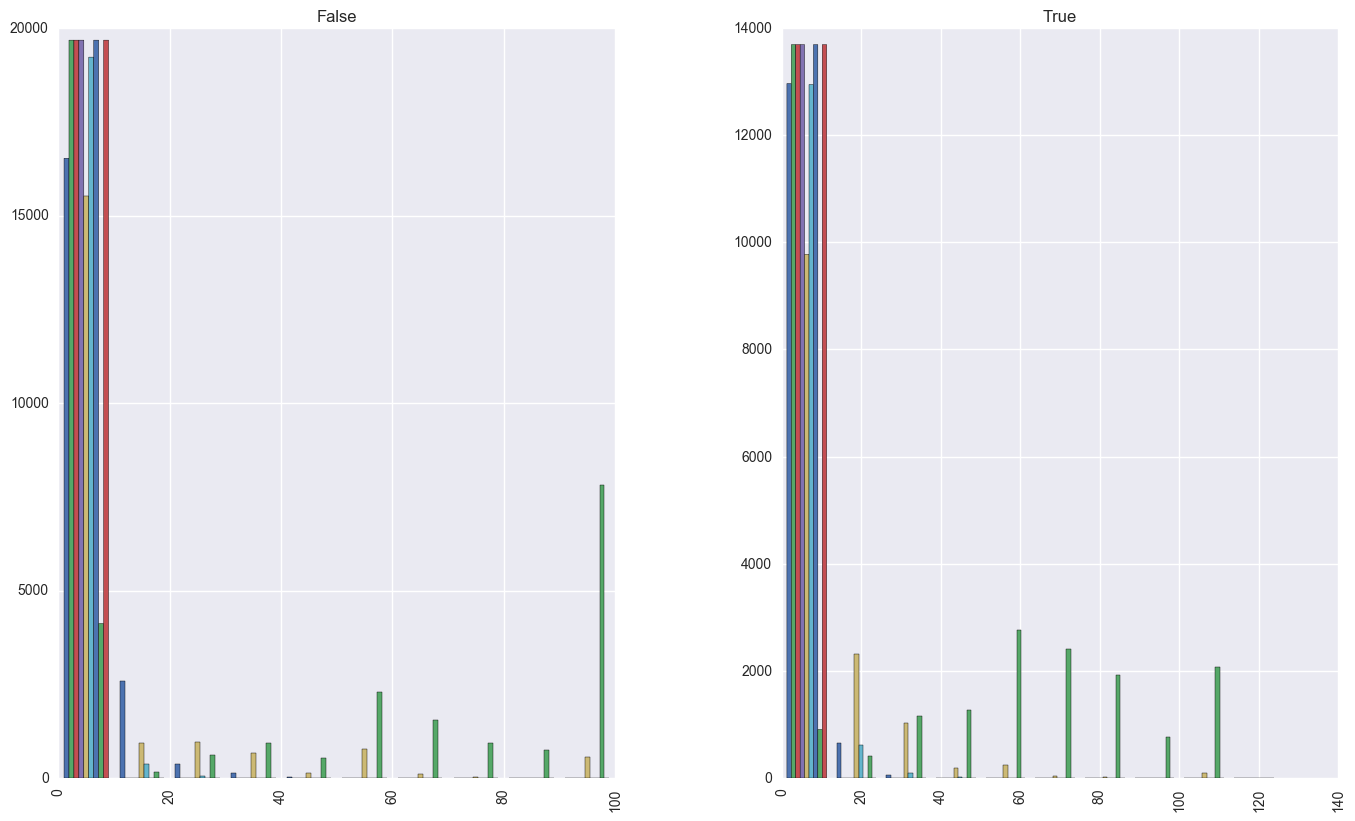

In [54]:


train.hist(figsize=(16,10),sharex=False, by = 'active')

city
Astapor           Axes(0.125,0.125;0.775x0.775)
King's Landing    Axes(0.125,0.125;0.775x0.775)
Winterfell        Axes(0.125,0.125;0.775x0.775)
Name: avg_dist, dtype: object

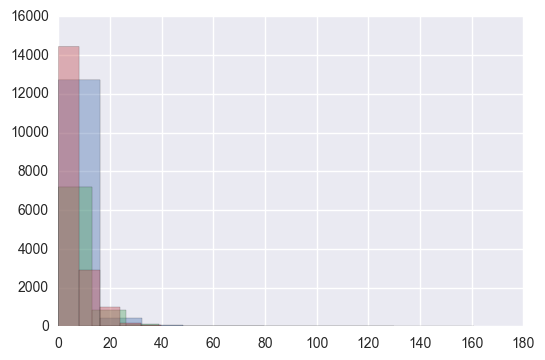

In [12]:
train.groupby('city').avg_dist.hist(alpha=0.4,label ='city')

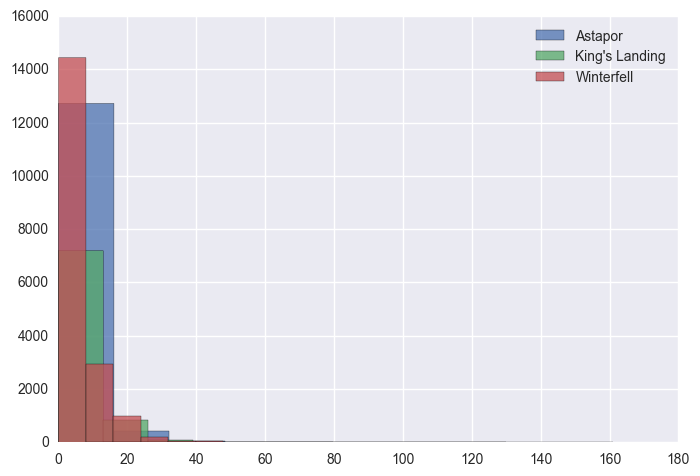

In [77]:
groups = train.groupby("city")['avg_dist']

fig, ax = plt.subplots()

for k, v in groups:
    v.hist(label=k, alpha=.75, ax=ax)

ax.legend()

AttributeError: 'DataFrame' object has no attribute 'avg_dist'

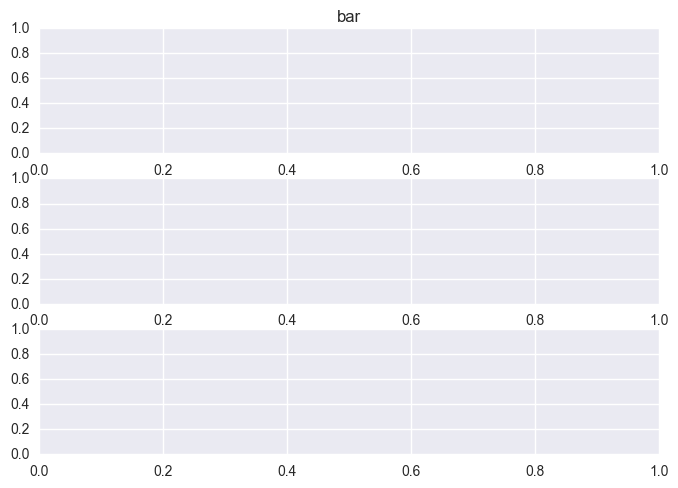

In [59]:
train.groupby('active').avg_dist.hist(alpha=0.4,label ='active')

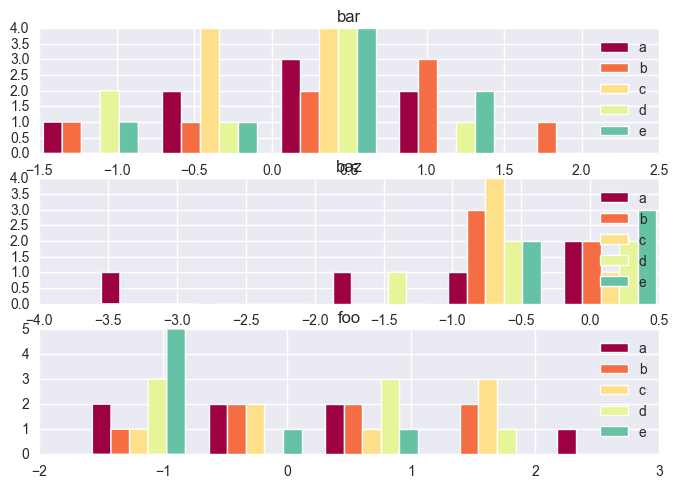

In [58]:
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

x = pd.DataFrame(rnd.randn(100).reshape(20, 5), columns=list('abcde'))

group_col = 'groups'
groups = ['foo', 'bar', 'baz']
x[group_col] = pd.Series(rnd.choice(groups, len(x)))

g = x.groupby(group_col)
num_groups = g.ngroups

fig, axes = plt.subplots(num_groups)
for i, (k, group) in enumerate(g):
    ax = axes[i]
    ax.set_title(k)
    group = group[[c for c in group.columns if c != group_col]]
    num_columns = len(group.columns)
    colours = cm.Spectral([float(x) / num_columns for x in range(num_columns)])
    ax.hist(group.values, 5, histtype='bar',
            label=list(group.columns), color=colours,
            linewidth=1, edgecolor='white')
    ax.legend()

plt.show()

In [69]:
[float(x) / num_columns for x in range(num_columns)]

[0.0, 0.5]

In [73]:
# df = pd.DataFrame({'value': value, 'type': type})
df['dummy'] = 1

ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

2

[[ 0.61960787  0.00392157  0.25882354  1.        ]
 [ 0.79723185  0.20092272  0.30080739  1.        ]
 [ 0.91395618  0.36239908  0.27935411  1.        ]
 [ 0.97485583  0.55740101  0.32272204  1.        ]
 [ 0.99346405  0.74771243  0.43529413  1.        ]
 [ 0.99669358  0.89750097  0.57708576  1.        ]
 [ 0.99807766  0.99923107  0.74602078  1.        ]
 [ 0.91733949  0.9669358   0.62006923  1.        ]
 [ 0.74771243  0.89803922  0.627451    1.        ]
 [ 0.52733565  0.81061131  0.6452134   1.        ]
 [ 0.32802769  0.68050752  0.68027684  1.        ]
 [ 0.22652826  0.49388699  0.72249137  1.        ]]


ValueError: color kwarg must have one color per dataset

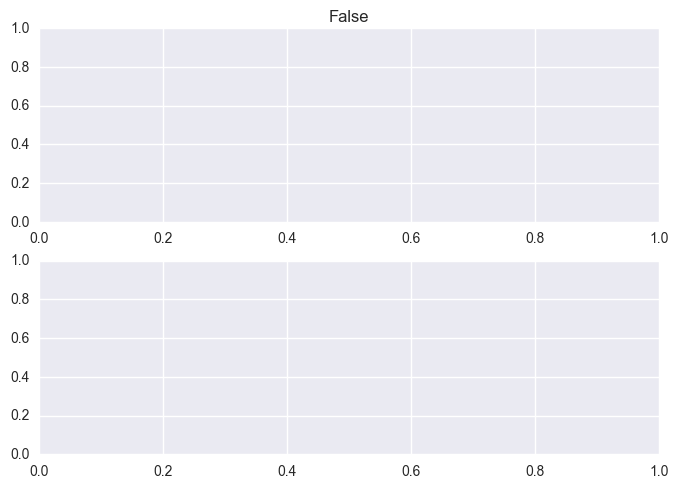

In [72]:
# x = pd.DataFrame(rnd.randn(100).reshape(20, 5), columns=list('abcde'))
x = train
group_col = 'active'
# groups = [True,False]
# x[group_col] = pd.Series(rnd.choice(groups, len(x)))

g = x.groupby(group_col)
num_groups = g.ngroups

fig, axes = plt.subplots(num_groups)
for i, (k, group) in enumerate(g):
    ax = axes[i]
    ax.set_title(k)
    group = group[[c for c in group.columns if c != group_col]]
    num_columns = len(group.columns)
    colours = cm.Spectral([float(x) / num_columns for x in range(num_columns)])
    print(colours)
    
    ax.hist(group.avg_dist, 5, histtype='bar',
            label=list(group.columns), color=colours,
            linewidth=1, edgecolor='white')
    ax.legend()

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1218bd278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123ef9860>]], dtype=object)

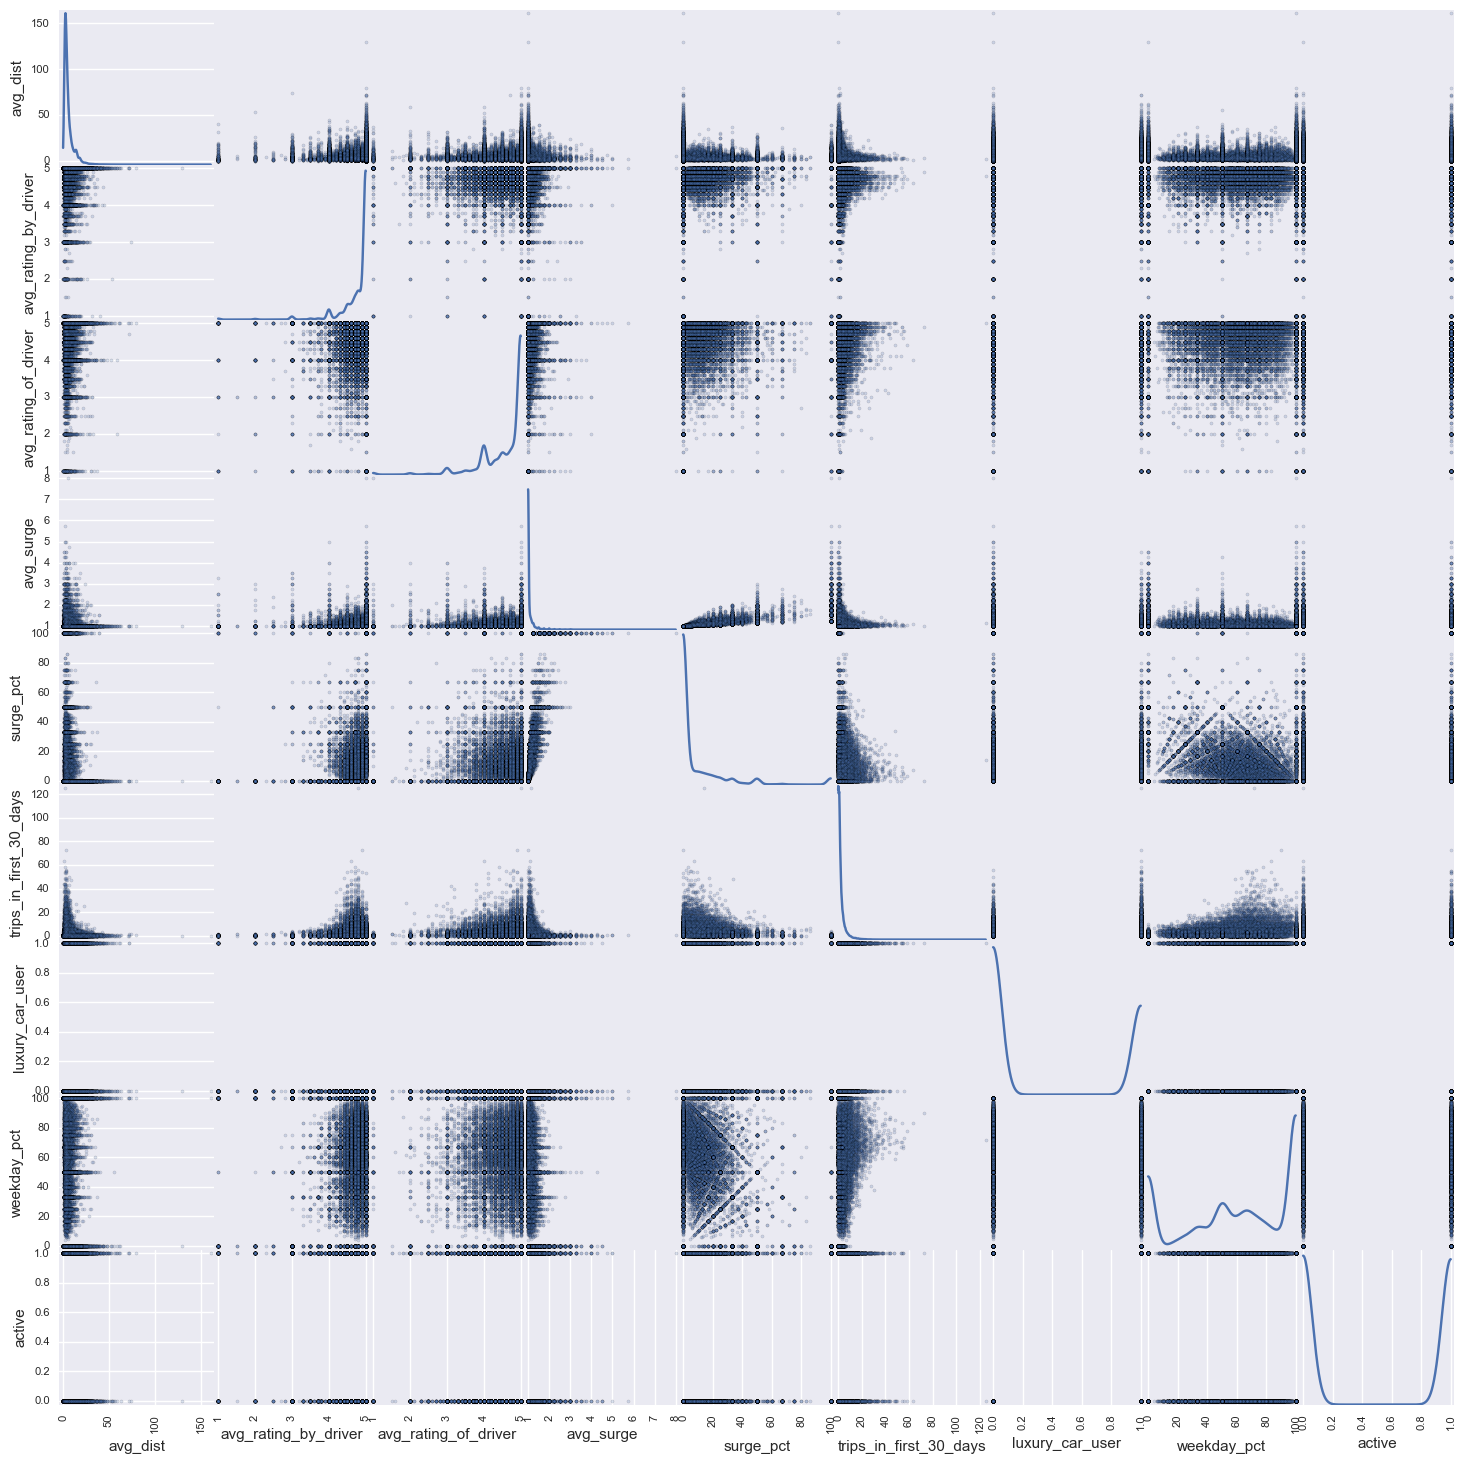

In [74]:
scatter_matrix(train, alpha=0.2, figsize=(18, 18), diagonal='kde')

In [ ]:
# def load_data():
#     parse_dates = ['last_trip_date', 'signup_date']
#     train = pd.read_csv("data/churn_train.csv",parse_dates=parse_dates)
#     test = pd.read_csv("data/churn_test.csv",parse_dates=parse_dates)

#     cats  =[ 'phone', 'city']
#     for cat in cats:
#         tmp = pd.get_dummies(df.pop(cat))
#         df = pd.concat([df, tmp], axis = 1)
#     return train,test

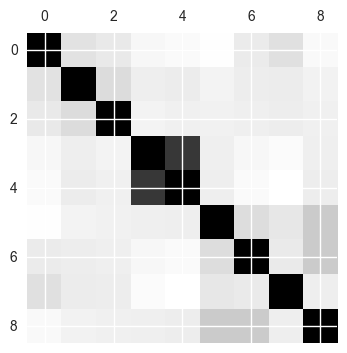

In [48]:
plt.matshow(train.corr())

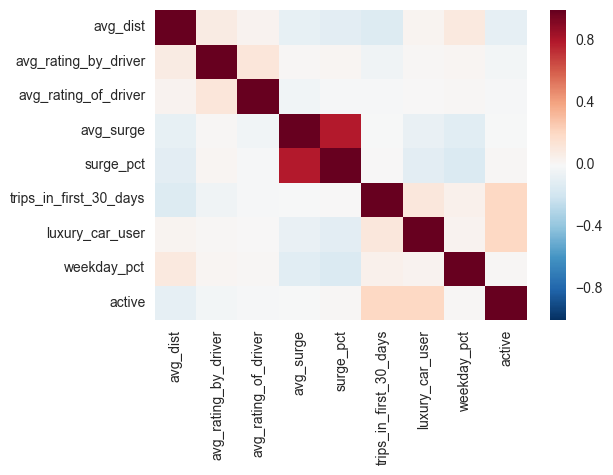

In [49]:
# calculate the correlation matrix
corr = train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [50]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [94]:
def load_data_with_history_missing():
    odata = pd.read_csv('data/churn_train.csv')
    odata['last_trip_date'] = pd.to_datetime(odata['last_trip_date'],format='%Y-%m-%d')
    odata['signup_date'] = pd.to_datetime(odata['signup_date'],format='%Y-%m-%d')
    cutoff_date = datetime.strptime('2014-07-01','%Y-%m-%d').date() -pd.DateOffset(30, 'D')
    odata['active'] = odata['last_trip_date'] >= cutoff_date
    odata = pd.get_dummies(data=odata, columns=['city'])
    odata['history'] = odata['last_trip_date'] - odata['signup_date']
    odata.fillna(odata.mean(),inplace=True)
    #take only required columns
    mdata = odata[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','city_King\'s Landing','city_Winterfell','surge_pct','trips_in_first_30_days','luxury_car_user','weekday_pct','history','active']]
    y = mdata.pop('active')
    X = mdata.values
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    return mdata, X_train,X_test,y_train,y_test

In [95]:
mdata, X_train,X_test,y_train,y_test = load_data_with_history_missing()

In [96]:
mdata

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city_King's Landing,city_Winterfell,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,history
0,6.94,5.0,5.000000,1.00,0.0,0.0,0.0,0,False,100.0,111 days
1,8.06,5.0,5.000000,1.00,0.0,0.0,0.0,2,True,0.0,1 days
2,21.50,4.0,4.601697,1.00,0.0,1.0,0.0,1,True,100.0,139 days
3,9.46,5.0,4.601697,2.75,0.0,1.0,100.0,1,False,100.0,1 days
4,13.77,5.0,4.601697,1.00,0.0,1.0,0.0,0,False,100.0,102 days
5,14.51,5.0,4.601697,1.00,0.0,0.0,0.0,0,True,100.0,83 days
6,4.87,4.7,4.000000,1.00,0.0,0.0,0.0,0,False,66.7,93 days
7,1.78,4.0,5.000000,1.00,0.0,1.0,0.0,3,False,0.0,1 days
8,6.87,5.0,4.700000,1.00,0.0,0.0,0.0,3,False,66.7,29 days
9,2.41,5.0,3.000000,1.00,0.0,1.0,0.0,1,False,100.0,1 days


In [93]:
train.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'active'],
      dtype='object')

In [ ]:
DataFrameSummary()